In [27]:
#https://yulab-smu.top/treedata-book/chapter6.html 
require('ggplot2')# || install.packages('ggplot2', dependencies = TRUE)
require('BiocManager')# || install.packages('BiocManager', dependencies = TRUE)
require('ggtree')# || BiocManager::install('ggtree')
require('ggtreeExtra')# || BiocManager::install('ggtreeExtra')
require('treeio')
require('tidytree')
require('dplyr')
require('ggstar')
require('TDbook')
require('stringr')

In [28]:
options(repr.plot.width=20, repr.plot.height=20)

In [29]:
listcolor <- c('#FF0029','#377EB8','#66A61E','#984EA3','#00D2D5','#FF7F00','#AF8D00','#7F80CD','#B3E900','#C42E60','#A65628',
               '#F781BF','#8DD3C7','#BEBADA','#FB8072','#80B1D3','#FDB462','#FCCDE5','#99A893','#EED5D2','#3F00FF','#DABF86')

In [30]:
#cluster <- read.csv('cluster.csv', header = TRUE, sep = ',')
#meta <- read.csv('meta.csv', header = TRUE, sep = ',')
#data <- merge(x = cluster, y = meta, by = 'X')
data <- read.csv('meta.csv', header = TRUE, sep = ',')

In [36]:
data

X,cluster,name,segment,protein,type,subtype,year,host,pass,season,country,state,H,N
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>
J02176,40,A/WSN/1933,4,HA,A,H1N1,1933,Human,Pass,na,United_Kingdom,NA,H1,N1
CY021709,40,A/AA/Huston/1945,4,HA,A,H1N1,1945,Human,Pass,na,USA,Texas,H1,N1
CY020285,40,A/AA/Marton/1943,4,HA,A,H1N1,1943,Human,Pass,na,USA,Unknown,H1,N1
CY083910,19,A/Aalborg/INS132/2009,4,HA,A,H1N1,11/23/2009,Human,Pass,09_10,Denmark,NA,H1,N1
CY063606,19,A/Aalborg/INS133/2009,4,HA,A,H1N1,12/02/2009,Human,Pass,09_10,Denmark,NA,H1,N1
CY062691,19,A/Aarhus/INS116/2009,4,HA,A,H1N1,11/24/2009,Human,Pass,09_10,Denmark,NA,H1,N1
CY062699,19,A/Aarhus/INS118/2009,4,HA,A,H1N1,11/27/2009,Human,Pass,09_10,Denmark,NA,H1,N1
CY066935,19,A/Aarhus/INS236/2009,4,HA,A,H1N1,11/19/2009,Human,Pass,09_10,Denmark,NA,H1,N1
CY066943,19,A/Aarhus/INS237/2009,4,HA,A,H1N1,11/23/2009,Human,Pass,09_10,Denmark,NA,H1,N1


In [31]:
data$H <- factor(data$H, levels=str_sort(levels(as.factor(data$H)), numeric = TRUE))

In [32]:
tree <- read.tree("centroids_influenza_segment_4.fasta.tree")

In [33]:
cls <- split(data$X, data$H)
#cls <- list('x'=c("MH675632", "CY076493"))
treegroup <- groupOTU(tree, cls) 

In [34]:
p <- ggtree(treegroup, layout='circular')
p <- p %<+% data
p1 <- p + geom_tree() +  
    #geom_tiplab(aes(label=paste0('italic(', genus, ')~bolditalic(', species, ')~', geo)), parse=T)
    geom_tiplab(size = 5, align=TRUE, linesize=.25) + 
    geom_fruit(
         geom=geom_tile,
         mapping=aes(fill=H),
         width=0.05,
         offset=0.35
     ) +
     scale_fill_manual(
         name="Subtype",
         values=listcolor,
         guide=guide_legend(
                   keywidth=1.5,
                   keyheight=1.5,
                   order=3
               ),
         na.translate=FALSE
     ) +
    theme(
        legend.title=element_text(size=20), 
        legend.text=element_text(size=15),
        legend.spacing.y = unit(1, "cm")
    )

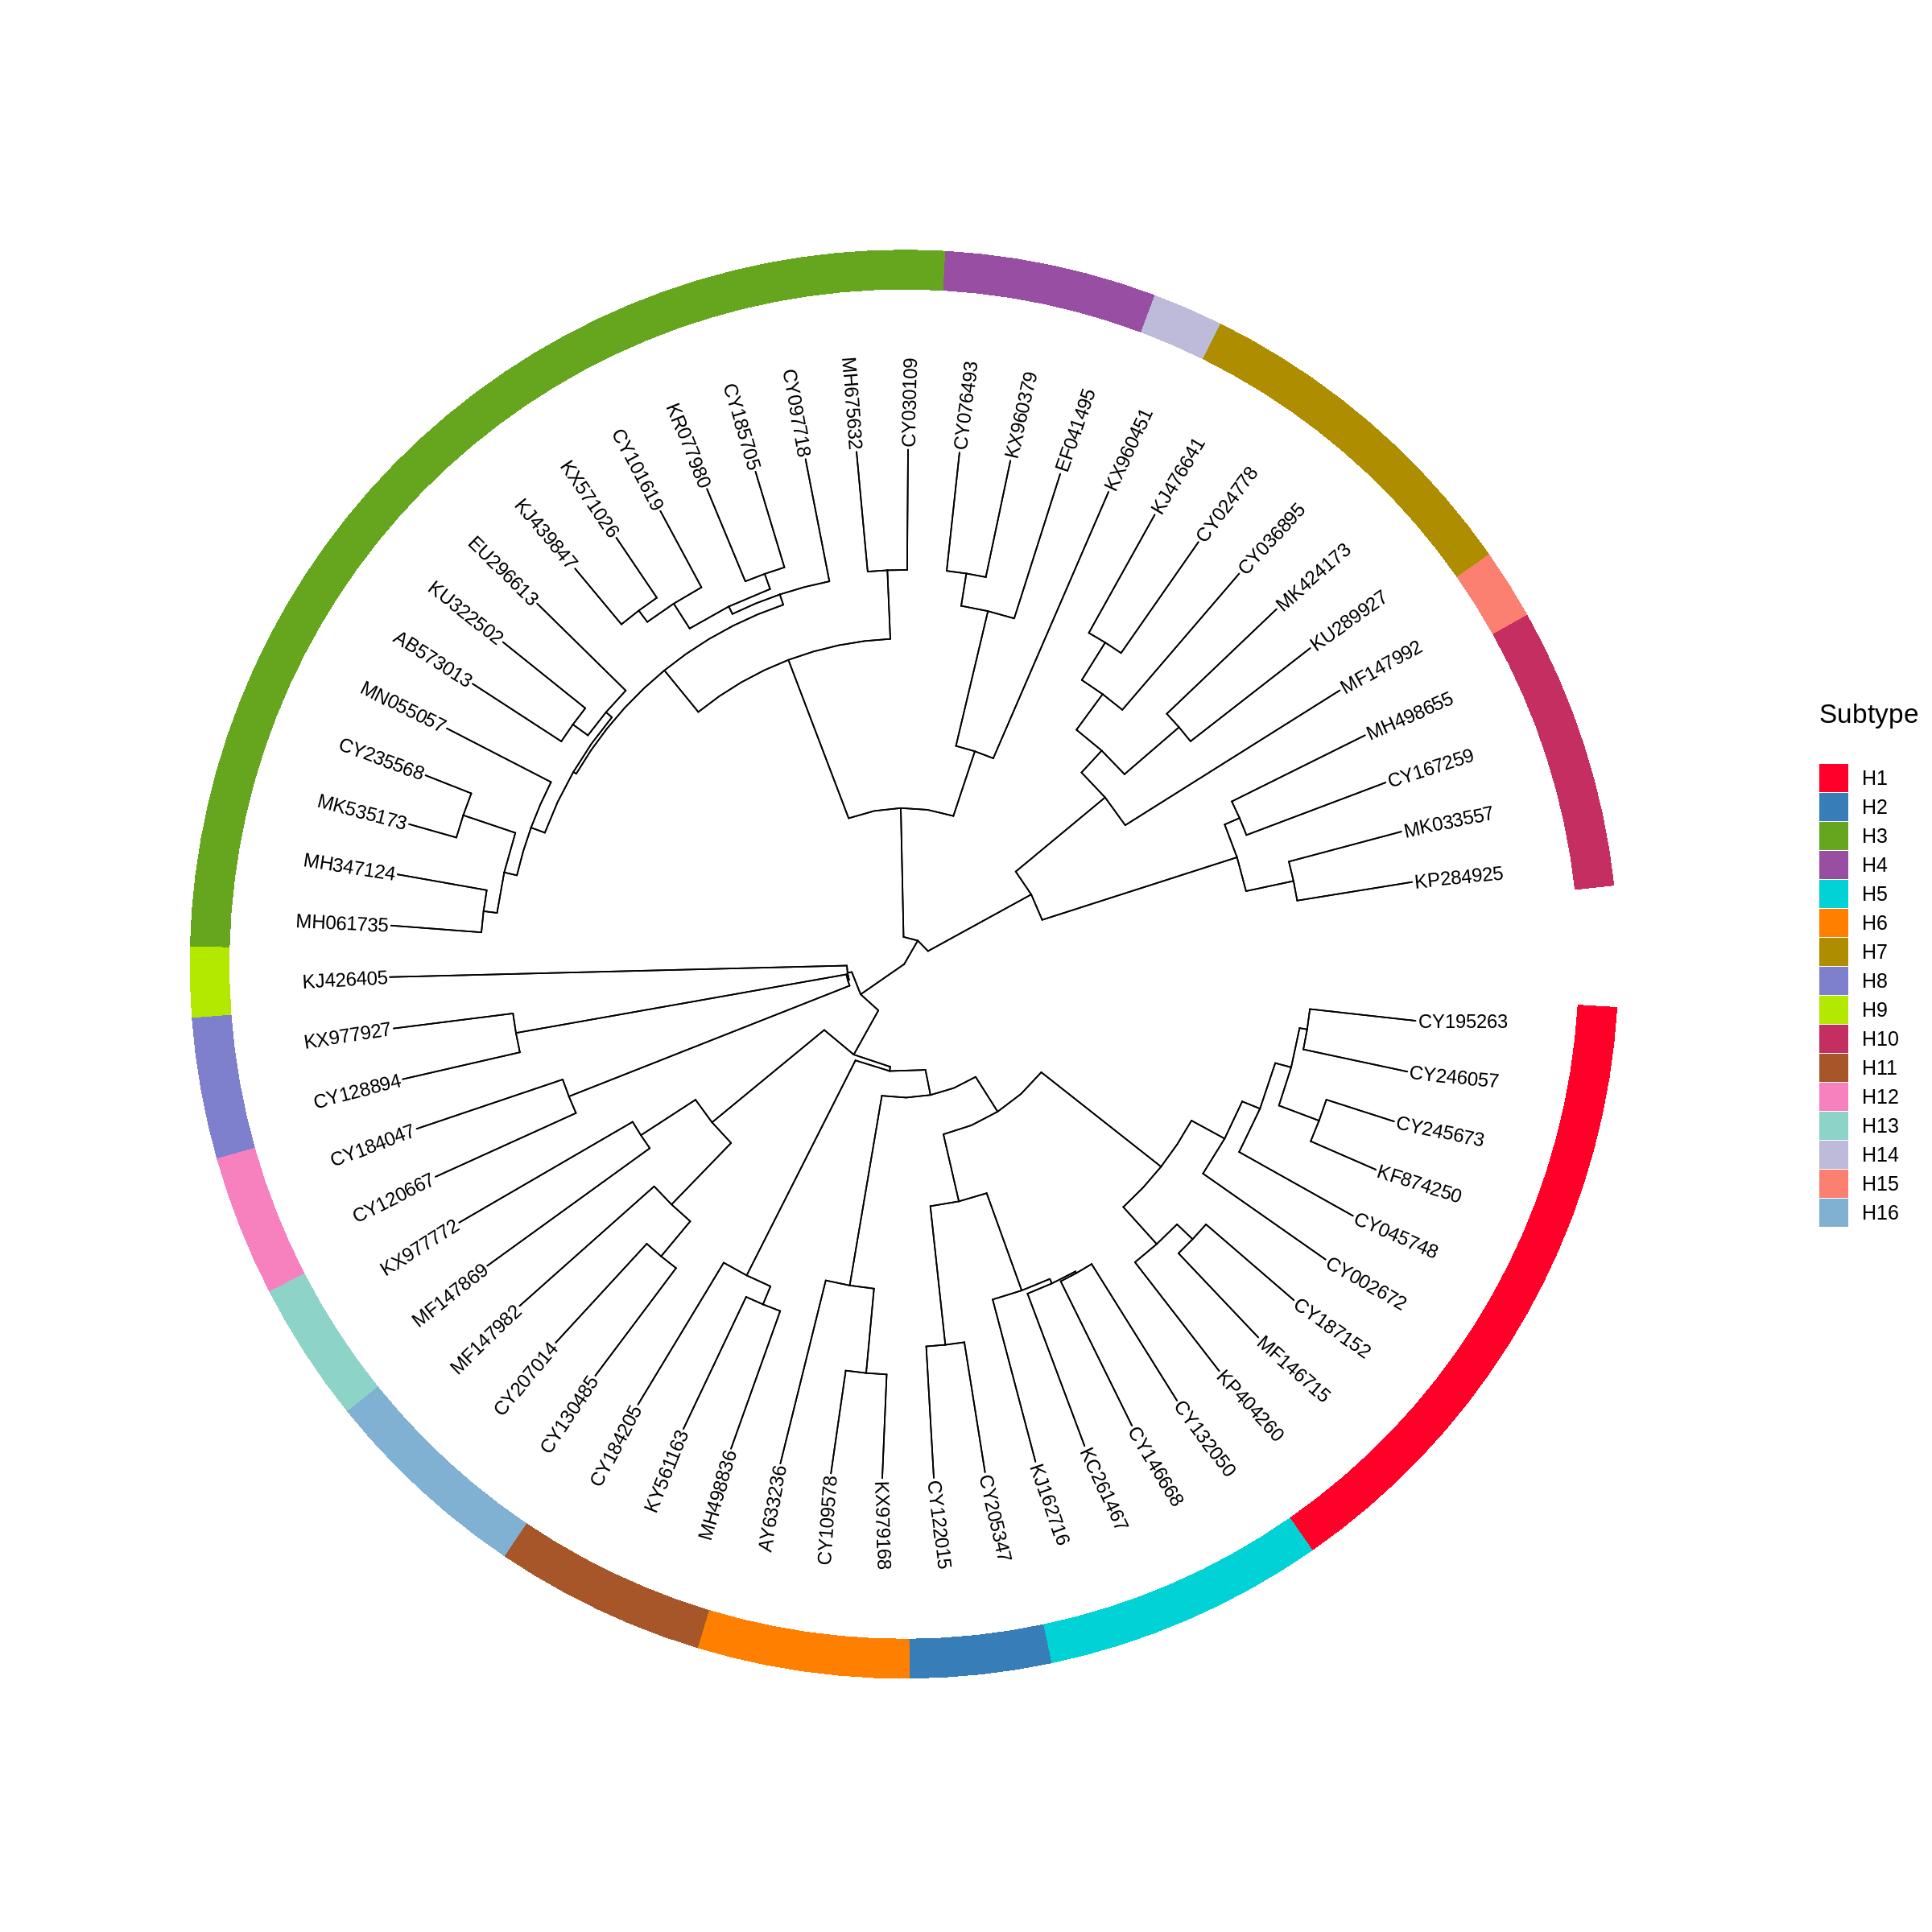

In [35]:
plot(p1)

In [49]:
ggsave("test.pdf", width = 50, height = 50, units = "cm", limitsize = FALSE)